# Análisis Percepción Marca `Tesla`

## Librerías

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

## Lectura de datos

In [2]:
encuestas_df = pd.read_excel('respuestas_encuesta.xlsx')

## Preprocesamiento de datos

Convertir los datos necesarios a numérico, si aún no lo están

In [4]:
def split_col_and_mean(string):
    string_list = string.split('-')
    return (int(string_list[0]) + int(string_list[-1]))/2

encuestas_df['Edad'] = encuestas_df['¿Cuál es su rango de edad?'].apply(split_col_and_mean)

In [5]:
satisfaction_dict = {'No poseo un Tesla' : 0,
                     'Muy insatisfecho' : 1,
                     'Insatisfecho' : 2,
                     'Neutral' : 3,
                     'Satisfecho' : 4,
                     'Muy satisfecho' : 5}
encuestas_df['Satisfaccion'] = encuestas_df['Si posee un vehículo Tesla, ¿cómo calificaría su nivel de satisfacción general con el vehículo?'].map(satisfaction_dict)

In [6]:
ingresos_dict = {'Menos de 20.000€' : 0,
                '20.000€ - 39.000€' : 1,
                '40.000€ - 59.999€' : 2,
                '60.000€ - 79.000€' : 3,
                'Más de 80.000€' : 4}

encuestas_df['Ingresos'] = encuestas_df['¿Cuál es su rango de ingresos anuales?'].map(ingresos_dict)

In [7]:
encuestas_df['Factores_compra'] = encuestas_df['¿Qué factores influyeron o influirían en su decisión de considerar la compra de un vehículo Tesla? (Seleccione todos los que apliquen) '].apply(lambda x: re.sub(r'\(.*?\)', '', x))

## Correlación de Pearson:

- Correlación entre edad y satisfacción con Tesla (si poseen un Tesla).
- Correlación entre ingresos y la probabilidad de poseer un Tesla.

In [8]:
# Filtrar solo a los que poseen un Tesla para la correlación de satisfacción y edad
tesla_owners = encuestas_df[encuestas_df['¿Posee actualmente un vehículo Tesla?'] == 'Sí']
print(f'Personas que poseen un Tesla: {len(tesla_owners)}')

Personas que poseen un Tesla: 1


In [9]:
genero = tesla_owners['¿Cuál es su género?'].values[0]
print(f'La única persona que tiene tesla es de género {genero}')

La única persona que tiene tesla es de género Femenino


Como solo hay una persona que posee tesla, no se puede evaluar Correlación entre edad y satisfacción con Tesla (si poseen un Tesla).

In [10]:
# Correlación entre ingresos y la probabilidad de poseer un Tesla
# Crear una variable binaria para posesión de Tesla
encuestas_df['Posee_Tesla'] = (encuestas_df['¿Posee actualmente un vehículo Tesla?'] == 'Sí').astype(int)
correlation_income_possession, _ = pearsonr(encuestas_df['Ingresos'].dropna(), encuestas_df['Posee_Tesla'].dropna())
print(f"Correlación Pearson entre ingresos y la probabilidad de poseer un Tesla: {correlation_income_possession}")

Correlación Pearson entre ingresos y la probabilidad de poseer un Tesla: 0.3464869538360478


Dado que solo tienes un encuestado que posee un Tesla, ciertamente el análisis de correlación para los propietarios de Tesla no es viable debido a la falta de variabilidad en ese grupo. Sin embargo, aún puedes realizar varios análisis útiles con los datos de los 62 participantes que no tienen un Tesla

## Análisis de Preferencias y Percepciones

Podrías explorar qué factores o características asocian los participantes con la marca Tesla, a pesar de no poseer uno. Esto podría incluir un análisis de frecuencia o de contenido sobre las respuestas a preguntas relacionadas con la percepción de la marca.

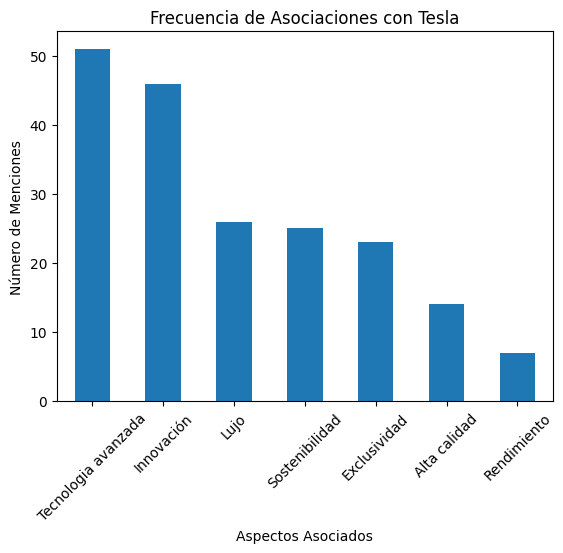

In [11]:
aspectos_tesla = encuestas_df['¿Con qué aspectos asocia principalmente a Tesla? (Seleccione todos los que apliquen)'].str.get_dummies(sep=', ')

# Sumar las menciones de cada aspecto
frecuencia_aspectos = aspectos_tesla.sum().sort_values(ascending=False)

# Graficar las frecuencias
frecuencia_aspectos.plot(kind='bar')
plt.title('Frecuencia de Asociaciones con Tesla')
plt.ylabel('Número de Menciones')
plt.xlabel('Aspectos Asociados')
plt.xticks(rotation=45)
plt.show()

In [17]:
frecuencia_aspectos

Tecnologia avanzada    51
Innovación             46
Lujo                   26
Sostenibilidad         25
Exclusividad           23
Alta calidad           14
Rendimiento             7
dtype: int64

## Análisis de Chi-Cuadrado
Realiza un test de Chi-cuadrado para ver si la distribución de ciertas respuestas, como las asociaciones con Tesla, difiere entre grupos demográficos como diferentes rangos de edad o niveles de ingreso.

In [12]:
for aspecto in aspectos_tesla.columns:
    tabla_contingencia = pd.crosstab(encuestas_df['¿Cuál es su rango de edad?'], aspectos_tesla[aspecto])
    p_value = 0.05
    chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
    print(f"Edad vs {aspecto}:\nChi2: {chi2}, p-value: {p}")
    if p <= 0.05:
        print(f'Existe relación entre la Edad y la percepcion de tesla sobre {aspecto}')
        print('')
    else:
        print(f'No Existe relación entre la Edad y la percepcion de tesla sobre {aspecto}')
        print('')

Edad vs Alta calidad:
Chi2: 5.437327188940093, p-value: 0.14243557115597086
No Existe relación entre la Edad y la percepcion de tesla sobre Alta calidad

Edad vs Exclusividad:
Chi2: 8.954305750350631, p-value: 0.029904626171859464
Existe relación entre la Edad y la percepcion de tesla sobre Exclusividad

Edad vs Innovación:
Chi2: 2.800462008085141, p-value: 0.42342386794559916
No Existe relación entre la Edad y la percepcion de tesla sobre Innovación

Edad vs Lujo:
Chi2: 1.0245791697404598, p-value: 0.7953048131730983
No Existe relación entre la Edad y la percepcion de tesla sobre Lujo

Edad vs Rendimiento:
Chi2: 2.6564516129032256, p-value: 0.4476786856122683
No Existe relación entre la Edad y la percepcion de tesla sobre Rendimiento

Edad vs Sostenibilidad:
Chi2: 6.41423429541596, p-value: 0.09310695534929286
No Existe relación entre la Edad y la percepcion de tesla sobre Sostenibilidad

Edad vs Tecnologia avanzada:
Chi2: 7.281095825426945, p-value: 0.06345800990578844
No Existe rela

## Análisis de Factores Determinantes para Considerar la Compra de un Tesla

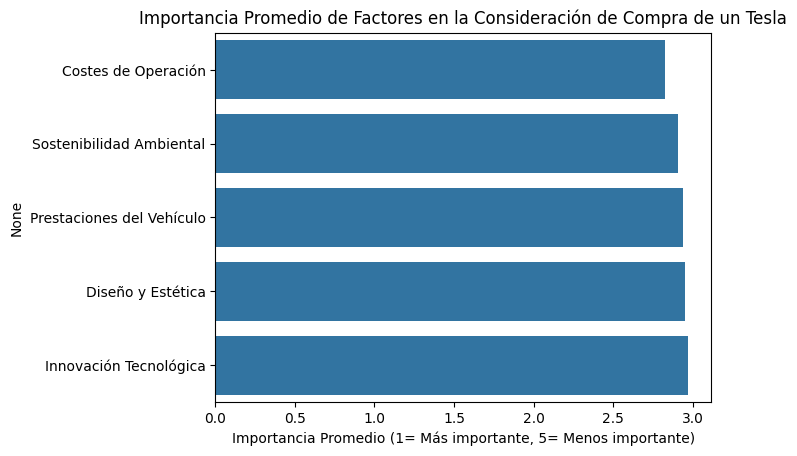

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un dataframe con las clasificaciones de factores
factores = encuestas_df[['¿Podría clasificar los siguientes factores en orden de importancia al considerar la compra de un vehículo Tesla? (1 = más importante, 5 = menos importante) [Innovación tecnológica]',
                         '¿Podría clasificar los siguientes factores en orden de importancia al considerar la compra de un vehículo Tesla? (1 = más importante, 5 = menos importante) [Sostenibilidad ambiental]',
                         '¿Podría clasificar los siguientes factores en orden de importancia al considerar la compra de un vehículo Tesla? (1 = más importante, 5 = menos importante) [Diseño y estética]',
                         '¿Podría clasificar los siguientes factores en orden de importancia al considerar la compra de un vehículo Tesla? (1 = más importante, 5 = menos importante) [Prestaciones del vehículo]',
                         '¿Podría clasificar los siguientes factores en orden de importancia al considerar la compra de un vehículo Tesla? (1 = más importante, 5 = menos importante) [Costes de operación]']]
factores.columns = ['Innovación Tecnológica', 'Sostenibilidad Ambiental', 'Diseño y Estética', 'Prestaciones del Vehículo', 'Costes de Operación']

# Visualizar las clasificaciones promedio de cada factor
mean_scores = factores.mean().sort_values()
sns.barplot(x=mean_scores.values, y=mean_scores.index, orient='h')
plt.title('Importancia Promedio de Factores en la Consideración de Compra de un Tesla')
plt.xlabel('Importancia Promedio (1= Más importante, 5= Menos importante)')
plt.show()


## Análisis de Factores de Influencia en la Consideración de Compra de Tesla

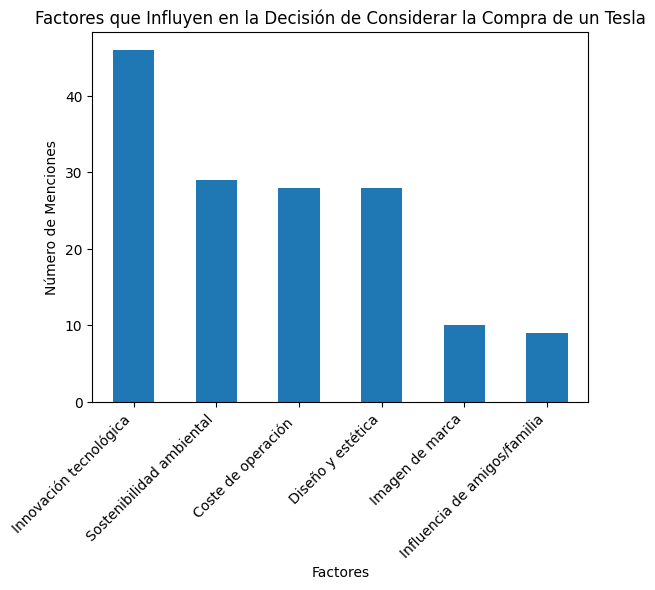

In [14]:
# Asumiendo que los factores están en una columna y son seleccionados múltiples
factores_influencia = encuestas_df['Factores_compra'].str.get_dummies(', ')

# Sumar las menciones de cada factor
frecuencia_factores = factores_influencia.sum().sort_values(ascending=False)

# Graficar las frecuencias
frecuencia_factores.plot(kind='bar')
plt.title('Factores que Influyen en la Decisión de Considerar la Compra de un Tesla')
plt.ylabel('Número de Menciones')
plt.xlabel('Factores')
plt.xticks(rotation=45, ha='right')
plt.show()


## Análisis de Experiencia Previa con Vehículos Eléctricos de Tesla

In [22]:
encuestas_df['¿Ha tenido alguna experiencia previa con vehículos eléctricos de Tesla?'].value_counts()

¿Ha tenido alguna experiencia previa con vehículos eléctricos de Tesla?
No    44
Sí    19
Name: count, dtype: int64

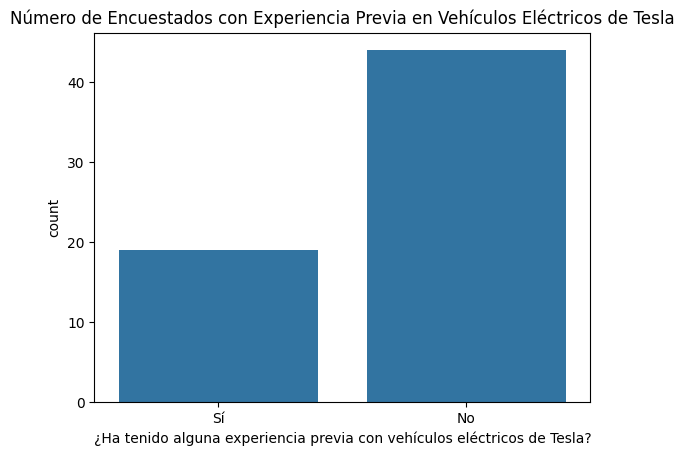

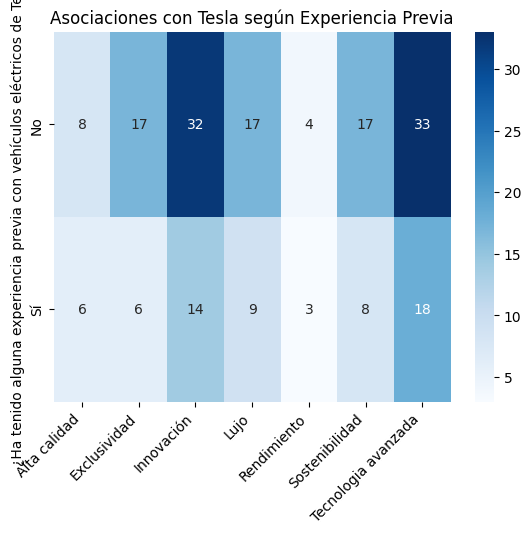

In [15]:
# Asumiendo que las experiencias previas están categorizadas como Sí/No
sns.countplot(x='¿Ha tenido alguna experiencia previa con vehículos eléctricos de Tesla?', data=encuestas_df)
plt.title('Número de Encuestados con Experiencia Previa en Vehículos Eléctricos de Tesla')
plt.show()

# Supongamos que 'asociaciones' es tu DataFrame de asociaciones mencionado en la pregunta.
asociaciones = encuestas_df['¿Con qué aspectos asocia principalmente a Tesla? (Seleccione todos los que apliquen)']

# Crear dummies para cada aspecto
aspectos_dummies = asociaciones.str.get_dummies(', ')

# Sumar dummies para obtener la cuenta total de cada aspecto
total_aspectos = aspectos_dummies.sum(axis=0)

# Ahora, sumar los aspectos dentro de cada categoría de experiencia previa
encuestas_df = encuestas_df.join(aspectos_dummies)
experiencia_agrupada = encuestas_df.groupby('¿Ha tenido alguna experiencia previa con vehículos eléctricos de Tesla?')[list(aspectos_dummies.columns)].sum()

# Comparar la influencia de la experiencia previa en las asociaciones con Tesla
# experiencia_asociaciones = encuestas_df.groupby('¿Ha tenido alguna experiencia previa con vehículos eléctricos de Tesla?')['¿Con qué aspectos asocia principalmente a Tesla? (Seleccione todos los que apliquen)'].value_counts().unstack().fillna(0)
sns.heatmap(experiencia_agrupada, annot=True, fmt=".0f", cmap="Blues")
plt.title('Asociaciones con Tesla según Experiencia Previa')
plt.xticks(rotation=45, ha='right')
plt.show()


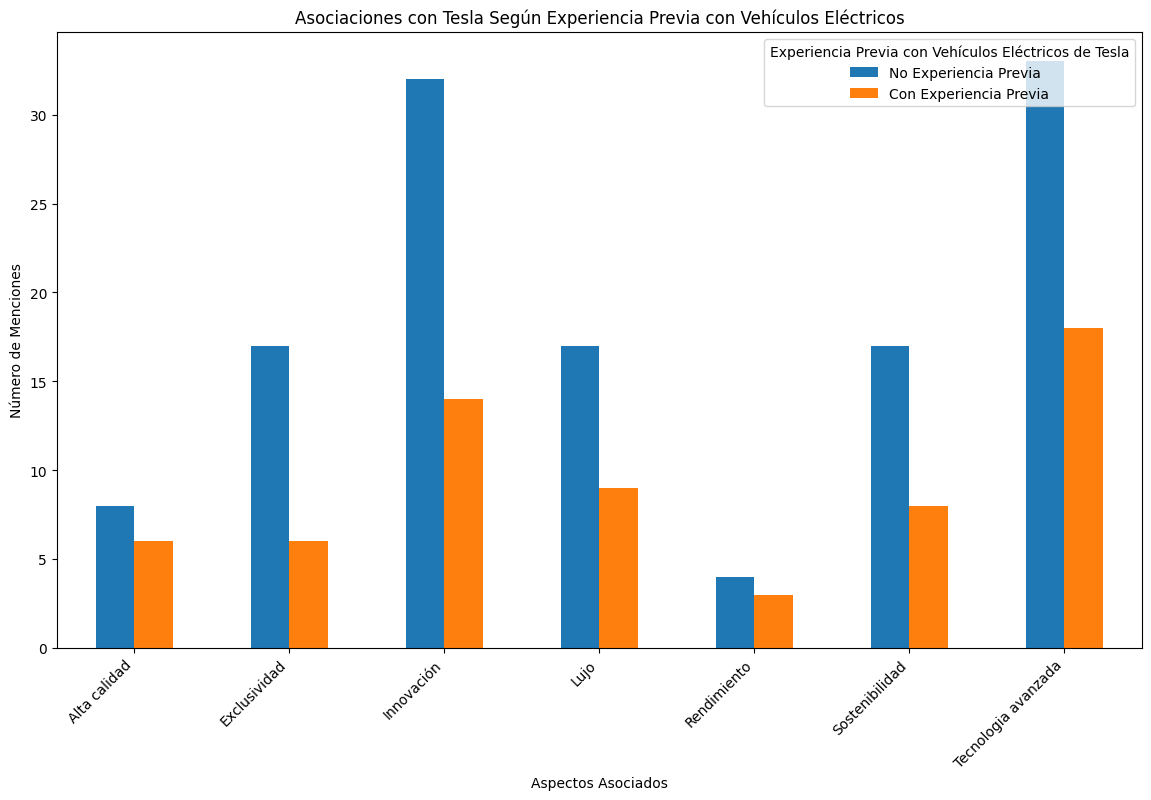

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir el grupo de experiencia en un DataFrame adecuado para visualización
df_vis = experiencia_agrupada.T
df_vis.columns = ['No Experiencia Previa', 'Con Experiencia Previa']

# Graficar
df_vis.plot(kind='bar', figsize=(14, 8))
plt.title('Asociaciones con Tesla Según Experiencia Previa con Vehículos Eléctricos')
plt.ylabel('Número de Menciones')
plt.xlabel('Aspectos Asociados')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Experiencia Previa con Vehículos Eléctricos de Tesla')
plt.show()
